In [125]:
import matplotlib.pyplot as plt
import json
from analysis.aoi.parameters import RATE
import numpy as np

In [126]:
with open('../../../results/aoi/aoi_128B_D0.json', 'rb') as fin:
    series_128B = json.load(fin)
    
with open('../../../results/aoi/aoi_256B.json', 'rb') as fin:
    series_256B = json.load(fin)
    
with open('../../../results/aoi/aoi_512B.json', 'rb') as fin:
    series_512B = json.load(fin)
    
with open('../../../results/aoi/aoi_1KB.json', 'rb') as fin:
    series_1KB = json.load(fin)
    
with open('../../../results/aoi/aoi_2KB.json', 'rb') as fin:
    series_2KB = json.load(fin)

In [127]:
def plot_bars(series, **kwargs):
    n_plots = len(series[0].keys())
    fig, axes = plt.subplots(n_plots, 1, figsize=(20, 5 * n_plots))
    offsets = np.linspace(-2.5, 2.5, len(series))
    labels = ['128B', '256B', '512B', '1KB', '2KB']
    
    for key, ax in zip(series[0].keys(), axes):
        ax.set_title(f'{"-".join(key.split("-")[:2])}-{key.split("-")[-1]}')
        x_ticks = np.arange(0, len(RATE[:4]) * 7.5, 7.5)
        for serie, offset, label in zip(series, offsets, labels):
            ax.bar(x_ticks + offset, height=serie[f'{"-".join(key.split("-")[:2])}-P{label}-{key.split("-")[-1]}'][:4], width=0.55, label=label)

        ax.set_xticks(x_ticks)
        ax.set_xticklabels(RATE[:4])
        ax.legend(loc='upper center', ncol=5)
        ax.set_yscale(kwargs.get('yscale', 'log'))
    plt.show()

## Median AoI

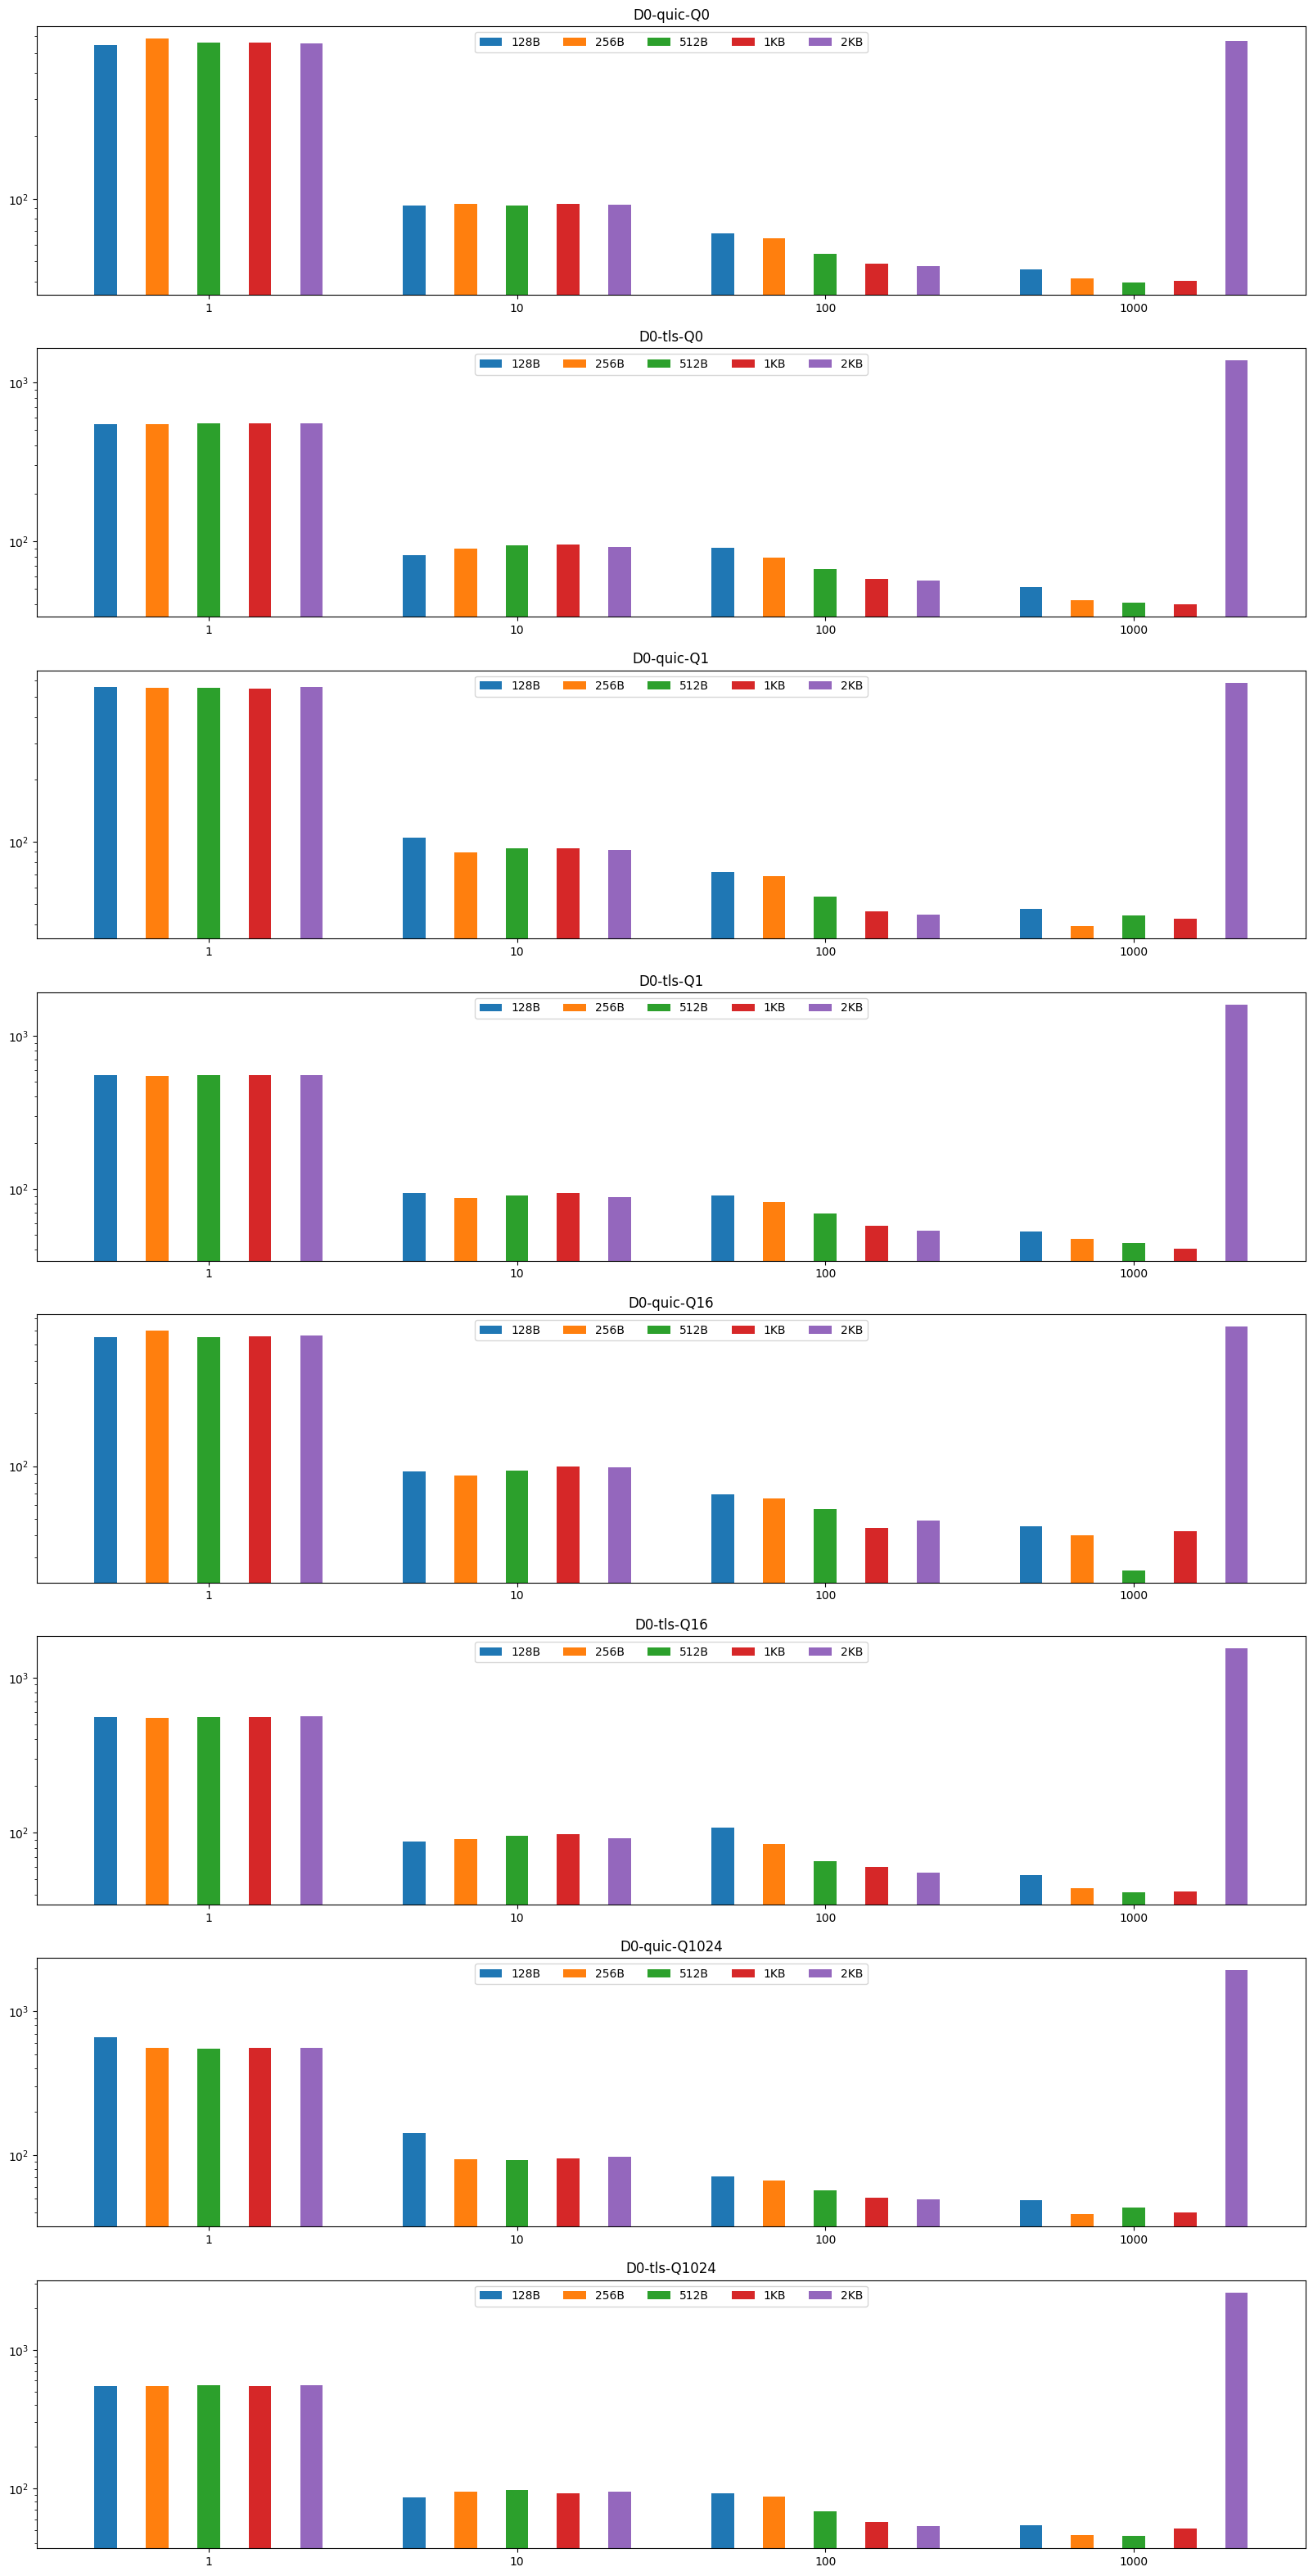

In [128]:
plot_bars([
    {key: series_128B['median_aoi'][key][0] for key in series_128B['median_aoi'].keys()},
    {key: series_256B['median_aoi'][key][0] for key in series_256B['median_aoi'].keys()},
    {key: series_512B['median_aoi'][key][0] for key in series_512B['median_aoi'].keys()},
    {key: series_1KB['median_aoi'][key][0] for key in series_1KB['median_aoi'].keys()},
    {key: series_2KB['median_aoi'][key][0] for key in series_2KB['median_aoi'].keys()}
])

## Energy

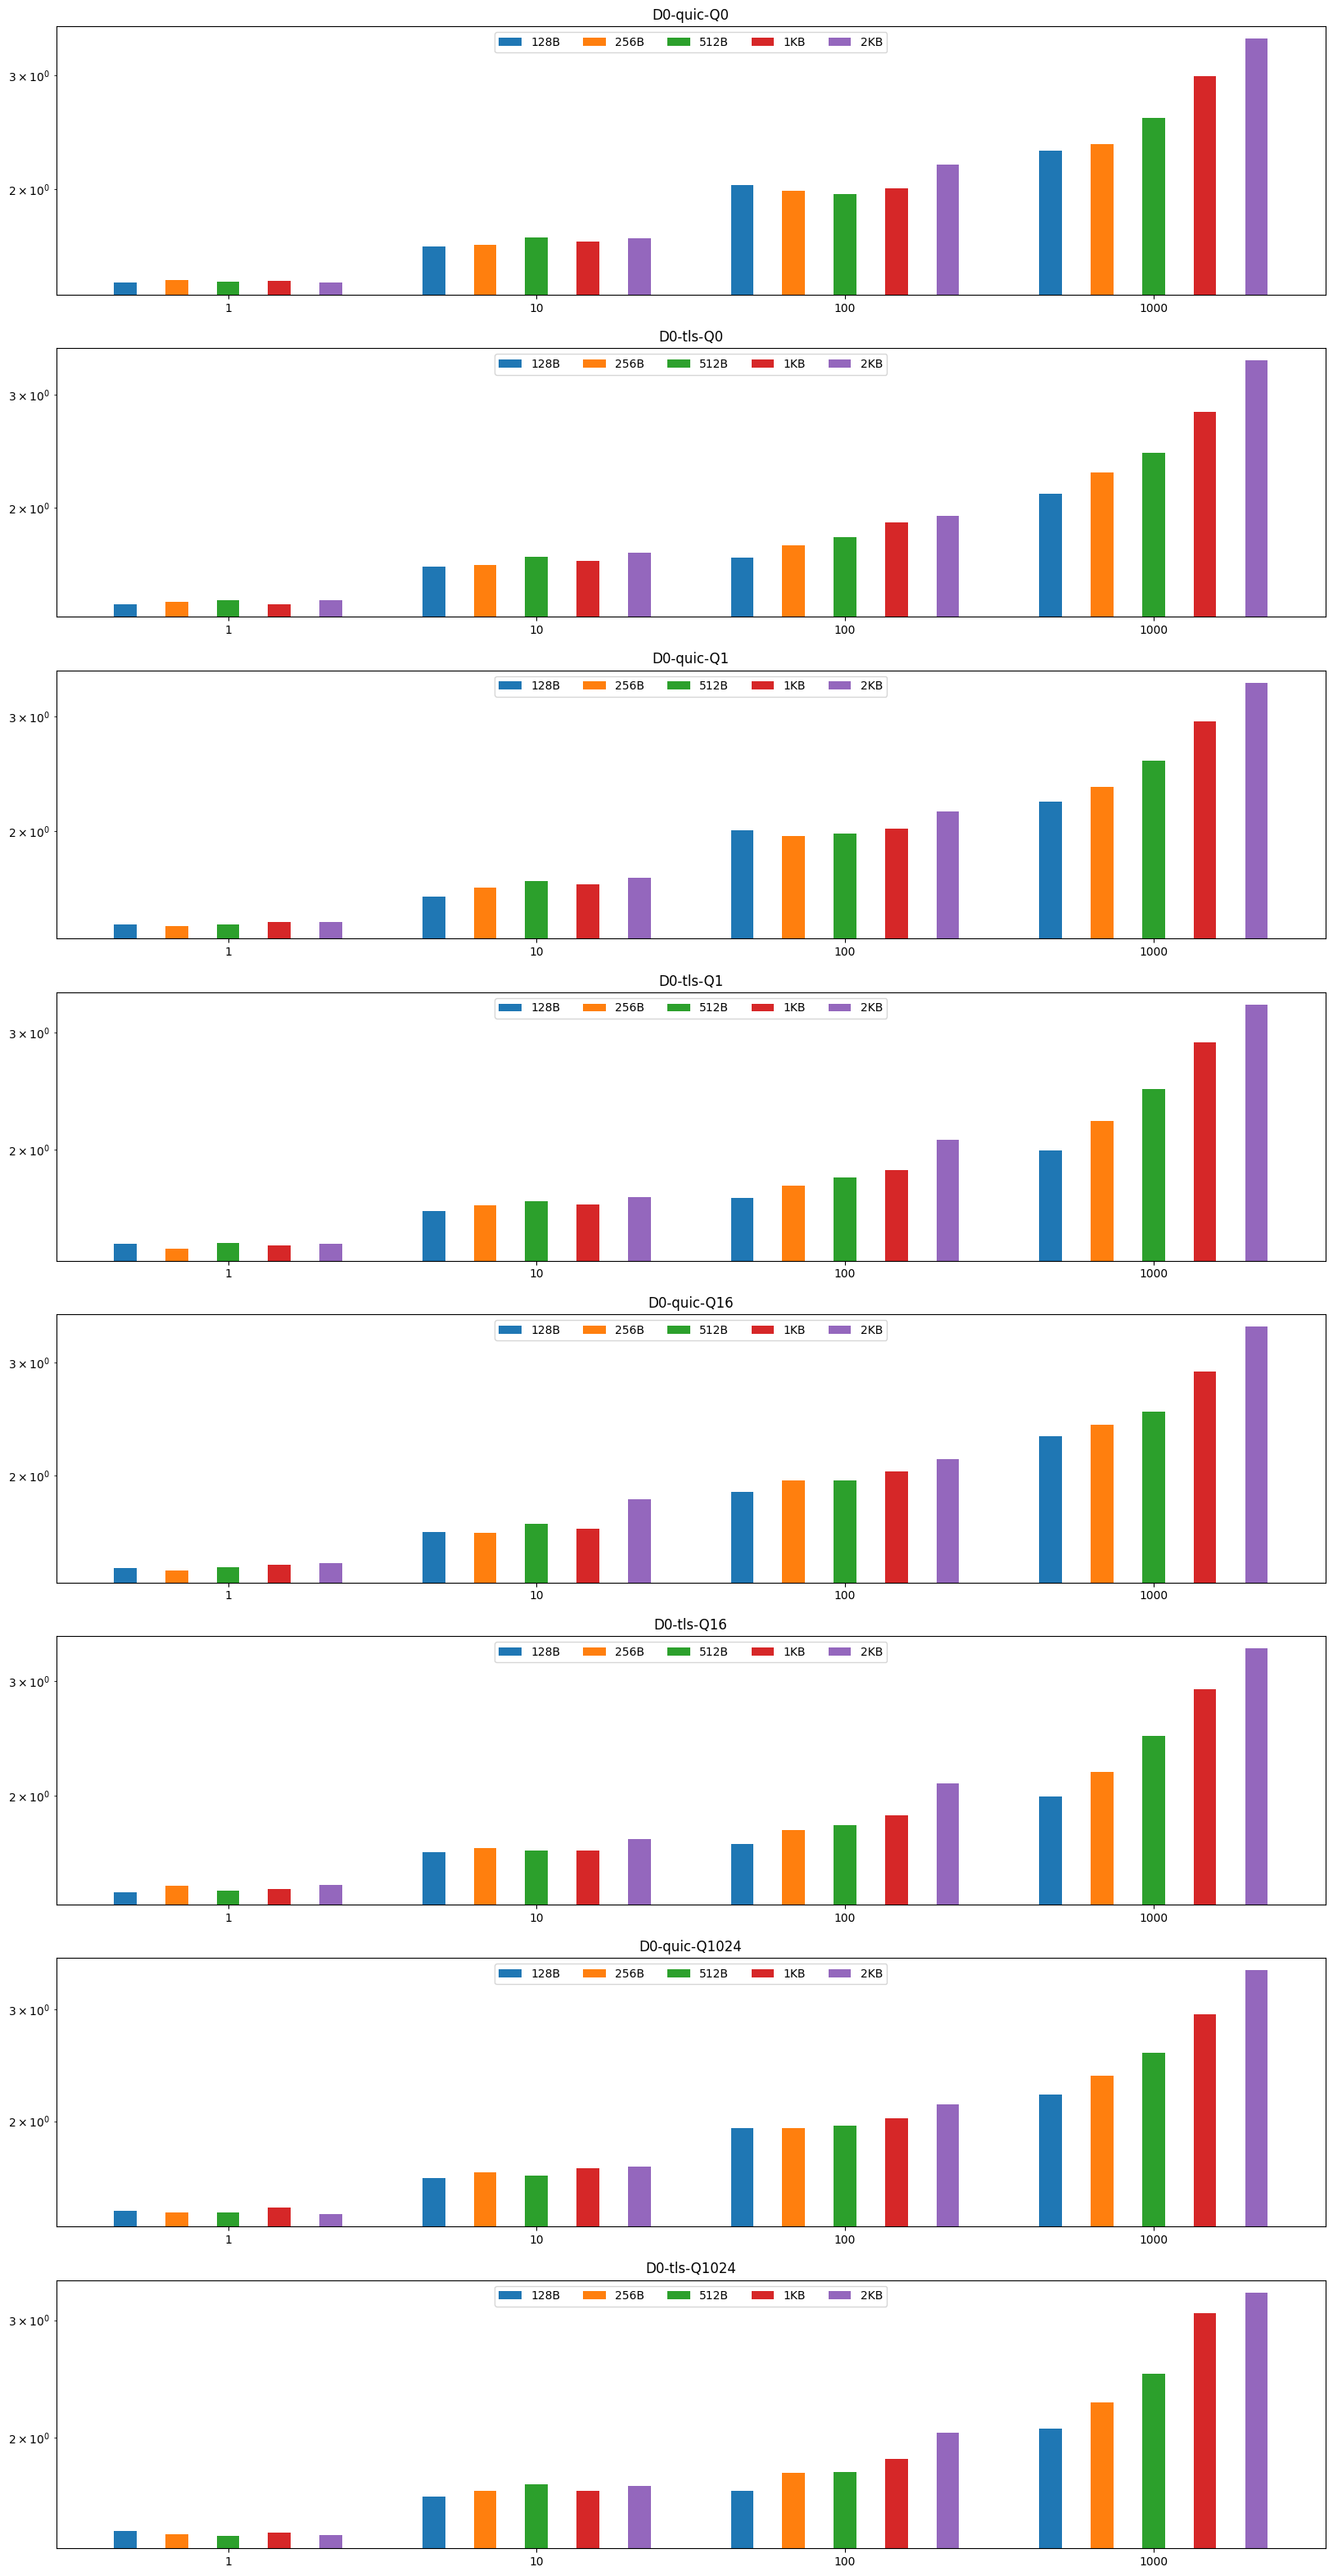

In [129]:
plot_bars([
    {key: [energy / time for energy, time in zip(series_128B['energy'][key][0], series_128B['time'][key][0])] for key in series_128B['median_aoi'].keys()},
    {key: [energy / time for energy, time in zip(series_256B['energy'][key][0], series_256B['time'][key][0])] for key in series_256B['median_aoi'].keys()},
    {key: [energy / time for energy, time in zip(series_512B['energy'][key][0], series_512B['time'][key][0])] for key in series_512B['median_aoi'].keys()},
    {key: [energy / time for energy, time in zip(series_1KB['energy'][key][0], series_1KB['time'][key][0])] for key in series_1KB['median_aoi'].keys()},
    {key: [energy / time for energy, time in zip(series_2KB['energy'][key][0], series_2KB['time'][key][0])] for key in series_2KB['median_aoi'].keys()}
])

## Rate

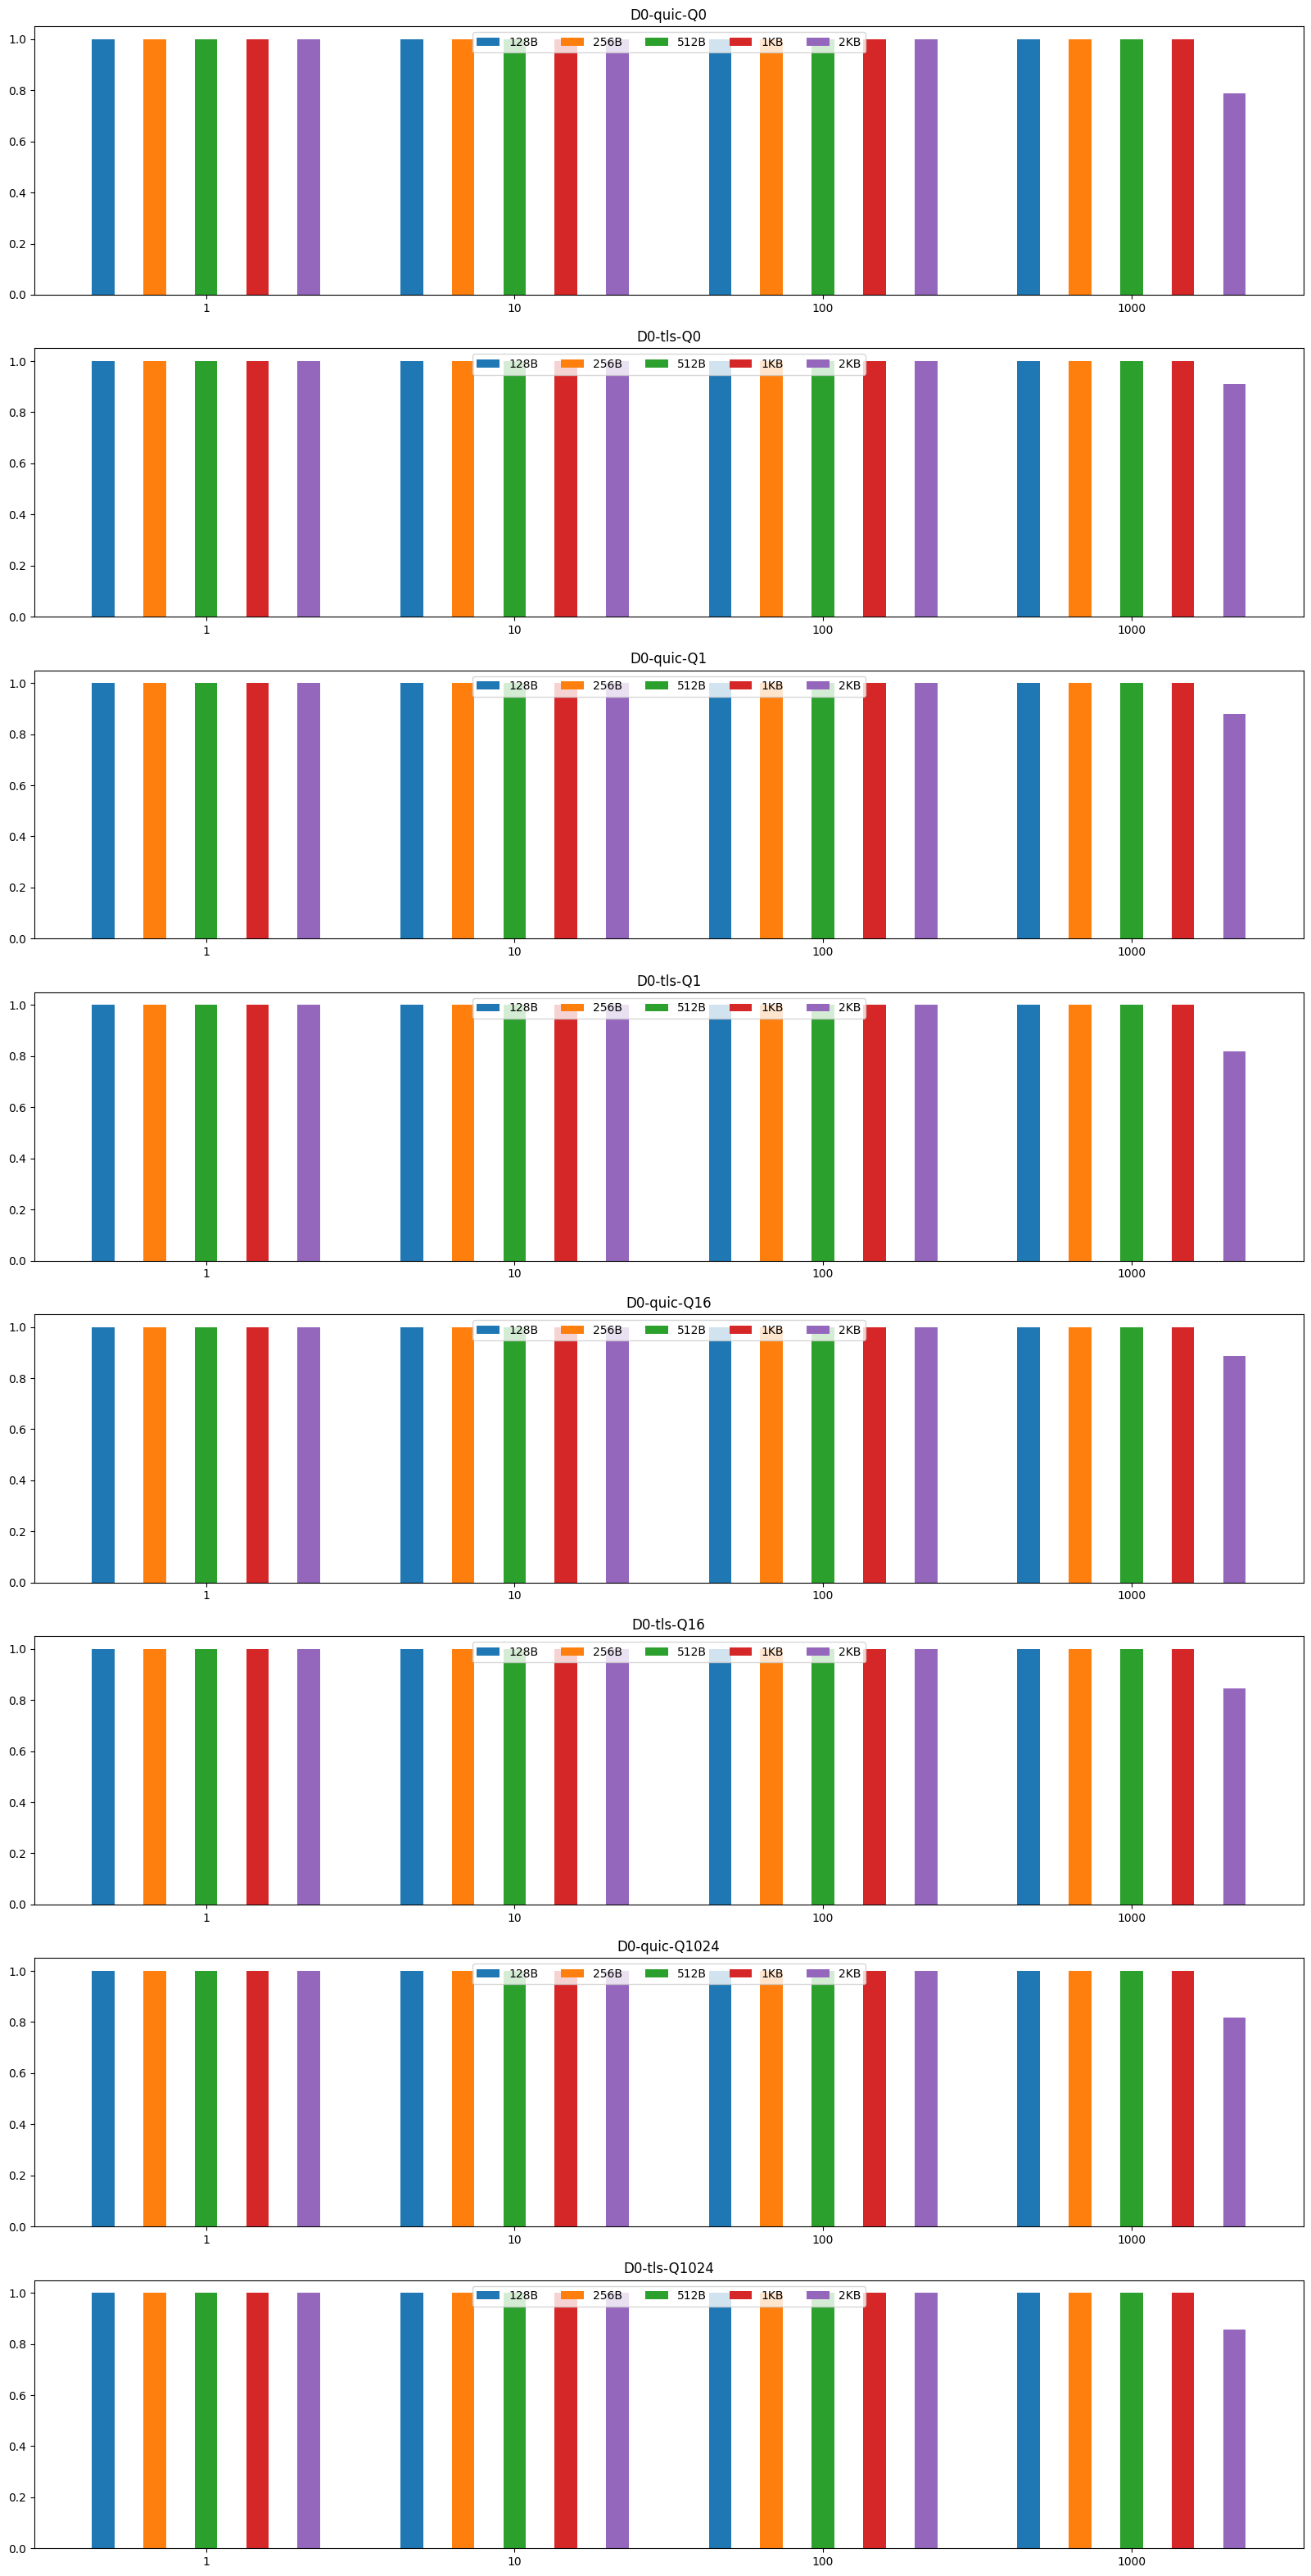

In [130]:
plot_bars([
    {key: [tr / rate for (tr, rate) in zip(series_128B['true_rate'][key][0], RATE[:4])] for key in series_128B['true_rate'].keys()},
    {key: [tr / rate for (tr, rate) in zip(series_256B['true_rate'][key][0], RATE[:4])] for key in series_256B['true_rate'].keys()},
    {key: [tr / rate for (tr, rate) in zip(series_512B['true_rate'][key][0], RATE[:4])] for key in series_512B['true_rate'].keys()},
    {key: [tr / rate for (tr, rate) in zip(series_1KB['true_rate'][key][0], RATE[:4])] for key in series_1KB['true_rate'].keys()},
    {key: [tr / rate for (tr, rate) in zip(series_2KB['true_rate'][key][0], RATE[:4])] for key in series_2KB['true_rate'].keys()}
], yscale='linear')